# 과제 설명
1. 코드 내 ### 1 ###, ### 2 ### 과 같은 빈칸을 채우고 보고서에 해당 코드에 대해 설명하기 - 8개
2. 보고서에 #[1. 질문]# 의 질문에 대한 답변 설명하기 - 2개

보고서는 1장 내로 적어주세요

In [ ]:
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        self.network = nn.Sequential(
            ### 1 ###
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
    
    def forward(self, inputs):
        return self.network(inputs)

In [ ]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import ### 2 ###, transforms
from tqdm import tqdm

def train(configs):
    # Dataset
    train_dataset = datasets.MNIST(
        root=configs['root'],
        train=True,
        transform=transforms.ToTensor(),
        download=True
    )
    val_dataset = datasets.MNIST(
        root=configs['root'],
        train=False,
        transform=transforms.ToTensor(),
        download=True
    )

    # DataLoader
    train_dataloader = DataLoader(
        dataset=train_dataset,
        batch_size=configs['batch_size'],
        shuffle=True,
    )
    val_dataloader = DataLoader(
        dataset=val_dataset,
        batch_size=configs['batch_size'],
        shuffle=False,
    )

    for inputs, labels in train_dataloader:
        print(f'Inputs : {inputs.shape}')
        print(f'Labels : {labels.shape}')
        break
    
    # Model
    net = NeuralNetwork()

    # Loss Fuction
    criterion = nn.CrossEntropyLoss(reduction='sum')

    # Optimizer
    optimizer = optim.SGD(params=### 3 ###, lr=1e-3)

    # Device
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f'Device : {device}')

    net = net.to(device)
    
    best_eval_loss = 100

    for epoch in range(configs['epochs']):
        print(f'Epoch : {epoch + 1} ==============================')
        
        # Train
        net.train()
        train_loss = 0.0
        for inputs, labels in tqdm(train_dataloader):
            ### 4 ###
            # 1. Forward
            ### 5 ###
            # 2. Compute Loss
            loss = criterion(outputs, labels)
            # 3. Backward
            ### 6 ###
            # 4. Gradient Descent
            optimizer.step()
            # 5. Gradient Intialization
            ### 7 ###

            train_loss += loss.item()

        train_loss = train_loss / 60000
        print(f'Train Loss : {train_loss}')

        net.eval()
        eval_loss = 0.0
        for inputs, labels in tqdm(val_dataloader):
            ### 4 ###
            
            #[1. 아래 Start와 End 사이 코드가 필요한 이유는 무엇일까요?]#
            # Start #
            with torch.no_grad():
                # End #
                # Forward
                outputs = net(inputs)
                # Compute Loss
                loss = criterion(outputs, labels)

            eval_loss += loss.item()
        
        eval_loss = eval_loss / 60000
        print(f'Eval Loss : {eval_loss / 10000}')

        #[2. 아래 Start와 End 사이 코드가 필요한 이유는 무엇일까요?]#
        # Start #
        if best_eval_loss > eval_loss:
            best_eval_loss = eval_loss
            torch.save(net.state_dict(), 'best_model_weight.pth')
        # End #

In [ ]:
configs = {
    'root': 'data',
    'batch_size': 64,
    'epochs': 20,
}

train(configs)

Label: 9


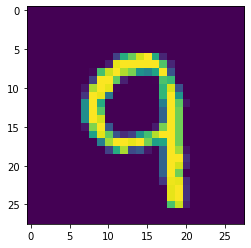

In [ ]:
import random
import matplotlib.pyplot as plt

def Tensor2Image(tensor):
    image = tensor.numpy()
    plt.imshow(image.reshape(28, 28))

n = random.randint(0, 1000)

val_dataset = datasets.MNIST(
    root=configs['root'],
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

test_input, test_label = val_dataset[n]

print(f'Label: {test_label}')
Tensor2Image(test_input)

In [ ]:
# Trained Network
net = NeuralNetwork()
### 8 ###

softmax = nn.Softmax(dim=1)

test_output = net(test_input)
test_prob = softmax(test_output)
test_predict = test_prob.argmax()

print(test_output)
print(test_prob)
print(test_predict)